# ch05 불리언 인덱싱

- 데이터셋으로부터 데이터를 필터링하는 것은 가장 흔하고 기본적인 연산이다.
- pandas에는 불리언 인덱싱을 사용해 데이터를 필터링하거나 부분 집합을 만드는 다양한 방법이 존재한다.
- 불리언 인덱싱(or boolean selection)은 pandas에서 불리언 값을 사용해 행을 선택하는 방법을 의미한다.
- DataFrame의 하나 이상의 col에 불리언 조건을 적용하여 생성한다.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

## 7. SQL WHERE절 해석

```sql
SELECT
UNIQUE_ID,
DEPARTMENT
GENDER,
BASE_SALARY
FROM BMPLOYEE
WHERE DEPARTMENT IN ('Houston Police Department-HPD', 'Houston Fire Department (HFD)')
AND GENDER = 'Female'
AND BASE_SALARY BETWEEN 80000 AND 120000;
```

- employee 데이터셋을 읽어들인다.

In [2]:
employee = pd.read_csv('../data/employee.csv')

In [3]:
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [4]:
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [5]:
employee.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [6]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

- SQL의 각 기준에 대해 하나씩 단일 문장을 작성한다.
- in은 isin으로 대체한다.

In [7]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

In [8]:
criteria_final = (criteria_dept &
                  criteria_gender &
                  criteria_sal)

In [9]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [10]:
employee.loc[criteria_dept, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
2,2,Houston Police Department-HPD,Male,45279.0
3,3,Houston Fire Department (HFD),Male,63166.0
5,5,Houston Police Department-HPD,Male,66614.0
10,10,Houston Fire Department (HFD),Male,52644.0
14,14,Houston Police Department-HPD,Male,77076.0


In [11]:
employee.loc[criteria_gender, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
0,0,Municipal Courts Department,Female,121862.0
1,1,Library,Female,26125.0
35,35,Health & Human Services,Female,34923.0
36,36,Public Works & Engineering-PWE,Female,60258.0
38,38,Health & Human Services,Female,67499.0


- 최종적으로 SQL과 동일한 결과를 얻을 수 있다.

In [12]:
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


- 급여 조건에 관한 불리언 Series는 between 함수를 이용하여 만들 수도 있다.

In [13]:
criteria_sal = employee.BASE_SALARY.between(80000, 120000)

- isin은 다른 pandas 문장과 조합하여 활용할 수 있다.
- 예를 들어 가장 빈번히 나타나는 부서 중 상위 5개에 속하는 모든 행을 제외해보자.

In [14]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]

In [15]:
criteria = ~(employee.DEPARTMENT.isin(top_5_depts))

In [16]:
employee[criteria].head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13


- pandas의 not 연산자 `~`는 Series의 모든 불리언 값을 반대로 만든다.

## 8. 주식 시장 수익률의 정규성 검정

- 아마존의 주식 시장 수익률을 확안해보고 정규 분포를 따르는지 확인해보자.

- 아마존 주가 데이터를 읽은 후 날짜를 인덱스로 설정한다.

In [17]:
amzn = pd.read_csv('../data/amzn_stock.csv', index_col='Date', parse_dates=['Date'])

In [18]:
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


- 종가만 선택한 Series를 생성한 후 pct_change() 메서드를 사용해 일별 수익률을 계산한다.

In [19]:
amzn_daily_return = amzn.Close.pct_change()

In [20]:
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

- 누락값을 삭제하고 수익률의 히스토그램을 그려 분포를 시각적으로 확인한다.

In [21]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)

- 정규 분포는 대략 68-95-99.7 법칙을 따른다.
- 68%의 데이터는 평균으로부터 1표준편차 내에 분포하고 95%는 2표준편차 그리고 99.7%는 3표준편차 내에 분포한다.
- 일별 수익률 중 편균으로부터 각각 1, 2, 3 표준편차 범위내에 속하는 비율을 계산한다.
- 이를 위해 평균과 표준편차를 구한다.

In [22]:
mean = amzn_daily_return.mean()
std = amzn_daily_return.std()

- 각 관측값 z-score의 절대값을 계산한다.
- z-score는 평균으로부터 얼마 정도의 표준편차만큼 떨어져 있는지의 수치다.

In [23]:
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [24]:
abs_z_score.head()

Date
2010-01-05    0.233456
2010-01-06    0.975694
2010-01-07    0.920188
2010-01-08    1.299686
2010-01-11    1.274043
Name: Close, dtype: float64

In [25]:
pcts = [abs_z_score.lt(i).mean() for i in range(1, 4)]

In [26]:
print('{:.3f} fall within 1 standard deviation.' 
      '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.787 fall within 1 standard deviation.0.956 within 2 and 0.985 within 3


- Series의 pct_change() 메서드는 디폴트로 현재 원소와 직전 원소 간의 % 변화를 계산한다.
- 이것을 활용하면 일별 % 수익률을 계산해준다.

- 히스토그램은 1차원 수치 데이터를 요약해 시작적으로 확인할 수 있는 좋은 도구다.

- 각 관측값이 평균으로부터 어느 정도 표준편차만큼 떨어져 있는지 계산하는 것을 z-score라고 부른다.

In [27]:
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean()
    std = daily_return.std()
    
    abs_z_score = abs(daily_return - mean) / std
    pcts = [abs_z_score.lt(i).mean() for i in range(1, 4)]
    
    print('{:.3f} fall within 1 standard deviation.' 
          '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

In [28]:
slb = pd.read_csv('../data/slb_stock.csv', index_col='Date', parse_dates=['Date'])

0.742 fall within 1 standard deviation.0.946 within 2 and 0.986 within 3


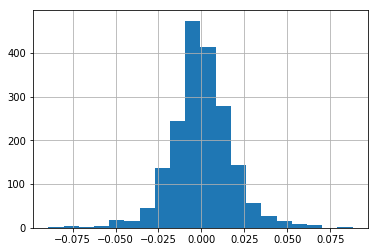

In [29]:
test_return_normality(slb)

## 9. query 메서드를 사용한 불리언 인덱싱 가독성 개선

- 불리언 인덱싱이 데이터를 읽고 쓰는데 있어 최선의 선택은 아니다.
- 특히 복잡한 필터를 한 줄로 사용할 때는 더욱 그렇다.
- pandas에는 DataFrame의 query 메서드를 사용해 문자열 기반의 문법을 제공한다.
- 이를 사용하면 보다 명확한 표현이 가능하다.

- 앞에서 수행했던 연봉 8만 ~ 12만 사이의 여성 경찰 또는 여성 소방 공무원을 찾는 것을 다시 수행한다.

- 직원 데이터를 읽은 후 부서, col을 변수에 설정한다.

In [30]:
employee = pd.read_csv('../data/employee.csv')

In [31]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

- query 문자열을 구성한 후 메서드를 실행한다.

In [32]:
qs = "DEPARTMENT in @depts " \
     "and GENDER == 'Female' " \
     "and 80000 <= BASE_SALARY <= 120000"

In [33]:
emp_filtered = employee.query(qs)

In [34]:
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


- query() 메서드에 사용하는 문자열은 일반적인 pandas의 코드에 비해 훨씬 더 일상 영어에 가깝다.
- 파이썬 변수는 `@`심볼을 사용해 참고할 수 있다.
- DataFrame의 col 이름은 query의 이름공간 내에서 따옴표 없이 참조할 수 있다.
- Female처럼 문자열을 사용하려면 따옴표로 감싸야 한다.
- 파이썬 코드처럼 이중 부등식을 하나의 식으로 표현할 수 있다.
- and, or, not 같은 논리 연산자를 사용할 수 있다.

- 부서 이름을 수작업으로 일일이 입력하는 대신 프로그램으로 생성할 수 있다.
- 빈도수 10위에 드는 부서에 속하지 않는 모든 여직원을 찾아보자.

In [35]:
top10_depts = employee.DEPARTMENT.value_counts().index[:10].tolist()

In [36]:
top10_depts

['Houston Police Department-HPD',
 'Houston Fire Department (HFD)',
 'Public Works & Engineering-PWE',
 'Health & Human Services',
 'Houston Airport System (HAS)',
 'Parks & Recreation',
 'Solid Waste Management',
 'Fleet Management Department',
 'Library',
 'Admn. & Regulatory Affairs']

In [37]:
qs = "DEPARTMENT not in @top10_depts and GENDER == 'Female'"

In [38]:
emp_filtered2 = employee.query(qs)

In [39]:
emp_filtered2.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
73,73,ADMINISTRATIVE SPECIALIST,Human Resources Dept.,55939.0,Black or African American,Full Time,Female,Active,2011-12-19,2013-11-23
96,96,ASSISTANT CITY CONTROLLER III,City Controller's Office,59077.0,Asian/Pacific Islander,Full Time,Female,Active,2013-06-10,2013-06-10
117,117,SENIOR ASSISTANT CITY ATTORNEY I,Legal Department,90957.0,Black or African American,Full Time,Female,Active,1998-03-20,2012-07-21
146,146,SENIOR STAFF ANALYST,Houston Information Tech Svcs,74951.0,White,Full Time,Female,Active,2014-03-17,2014-03-17


## 10. where 메서드를 사용한 Series 보존

- 불리언 인덱싱은 조건에 맞지 않는 모든 col을 데이터셋에서 제거하여 필터링한다.
- where() 메서드를 사용하면 모든 값을 제거하지 않고 그대로 유지할 수 있다.
- where() 메서드는 Series나 DataFrame을 원래 크기대로 유지하며 조건에 맞지 않는 값은 누락값으로 설정하거나 다른 것으로 대체한다.

- where() 메서드를 불리언 조건에 전달해 영화 데이터셋에 있는 배우 1에 대해 페이스북 좋아요 개수의 최소값과 최대값에 대한 상하한을 설정한다.

- 영화 데이터셋을 읽은 후 영화 제목을 인덱스로 설정하고 actor_1_facebook_likes col에 있는 누락되지 않은 모든 값을 선택한다.

In [40]:
movie = pd.read_csv('../data/movie.csv', index_col='movie_title')

In [41]:
fb_likes = movie['actor_1_facebook_likes'].dropna()

In [42]:
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

- describe() 메서드를 사용해 분표를 추정해보자.

In [43]:
fb_likes.describe(percentiles=[.1, .25, .5, .75, .9]).astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int32

- Series의 히스토그램을 그려 시각적으로 분포를 살펴본다.

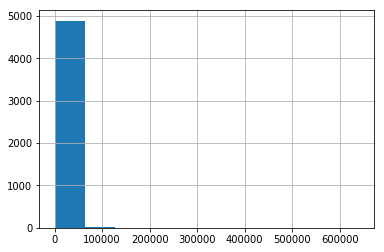

In [44]:
fb_likes.hist()

- 시각화한 그래프는 분포를 가늠할 수 없을 만큼 이상하다.
- 요약 통계량은 이 분포가 중간값에 비해 오른쪽으로 편향되어 있는 것으로 보인다(?)
- 좋아요 개수가 2만개 보다 적은지 테스트하는 조건을 만들어보자.

In [45]:
crit_high = fb_likes < 20000
crit_high.mean().round(2)

0.91

- 대략 91%의 영화에서 배우 1이 2만개보다 적은 좋아요를 기록했다.

- where() 메서드를 사용해 불리언 조건을 입력받아보자.
- 디폴트로 원래와 같은 크기의 Series를 반환하지만 False인 부분은 모두 누락값으로 대체된다.

In [46]:
fb_likes.where(crit_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

- where() 메서드의 두 번째 매개변수는 other
- 어떤 값으로 대체할지를 지정할 수 있다.

In [47]:
fb_likes.where(crit_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

- 비슷한 방법으로 좋아요 개수의 상한과 하한을 설정하는 기준을 만들 수도 있다.

In [48]:
crit_low = fb_likes > 300

In [49]:
fb_likes_cap = fb_likes.where(crit_high, other=20000)\
                       .where(crit_low, 300)

In [50]:
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

- 처음 Series와 수정된 Series의 크기는 동일하다.

In [51]:
len(fb_likes), len(fb_likes_cap)

(4909, 4909)

- 수정된 Series를 이용해 히스토그램을 그려보자.

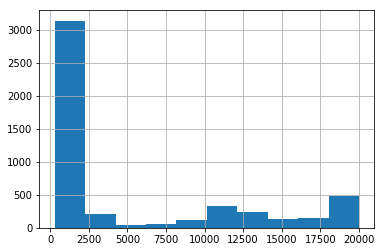

In [52]:
fb_likes_cap.hist()

- where() 메서드는 호출된 객체의 크기와 모양을 그대로 유지하고 그 값이 True인 곳은 값을 변경하지 않는다.
- where() 메서드를 적용하지 전에 누락된 값을 적절하게 처리해야한다.
- 누락된 값은 False로 처리되는 경우가 많기 때문에 where()메서드에서 다른 유효한 값으로 대체될 가능성이 있다.

- where() 메서드는 데이터의 상한과 하한을 만들어 히스토그램에 더 많은 막대가 나타나도록 할 수 있다.

- pandas에는 clip, clip_lower, clip_upper가 있다.
- clip() 메서드는 동일한 방법으로 상하한을 설정할 수 있다.

In [53]:
fb_likes_cap2 = fb_likes.clip(lower=300, upper=20000)

In [54]:
fb_likes_cap2.equals(fb_likes_cap)

True

## 11. DataFrame row 마스크

- mask() 메서드는 where() 메서드와 반대되는 기능을 수행한다.
- 디폴트는 불리언 조건이 참인 곳을 누락값으로 만든다.
- 문자 그대로 데이터셋의 값을 마스크하거나 덮어 버린다.

- 영화 데이터셋을 읽어 들인 후 영화 제목을 인덱스로 설정한다.

In [55]:
movie = pd.read_csv('../data/movie.csv', index_col='movie_title')

- 조건을 설정한다.

In [56]:
c1 = movie['title_year'] >= 2010

In [57]:
c2 = movie['title_year'].isnull()

In [58]:
crit = c1 | c2

- 조건을 이용하여 2010년 이후 영화의 모든 행을 누락값으로 만든다.
- title_year가 누락값인 모든 행도 누락값으로 만든다.

In [59]:
movie.mask(crit).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- dropna() 메서드를 이용하여 모든 값이 누락값인 행을 삭제한다.

In [61]:
movie_mask = movie.mask(crit).dropna(how='all')

In [62]:
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


- 불리언 인덱싱으로도 비슷하게 구현할 수 있다.

In [63]:
movie_boolean = movie[movie['title_year'] < 2010]

In [64]:
movie_boolean.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0


- 하지만 mask() 메서드를 이용한 것과 불리언 인덱싱을 이용한 것을 비교해보면 동일하지 않은 것을 확인할 수 있다.

In [66]:
movie_mask.equals(movie_boolean)

False

- 무엇이 다른지 확인해본다.
- 먼저 형태가 동일한지 확인한다.

In [68]:
movie_mask.shape == movie_boolean.shape

True

- col의 데이터 타입을 검사한다.

In [69]:
movie_mask.dtypes == movie_boolean.dtypes

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [70]:
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolean, movie_mask, check_dtype=False)

- assert_frame_equal() 함수는 여러 가지 방식으로 동일성을 확인하는 매개변수를 제공한다.
- 전달된 두 DataFrame이 동일할 경우 아무런 출력도 발생시키지 않는다.

- 마스크 후 누락값을 삭제하는 것과 불리언 인덱싱을 하는 것 간의 속도를 비교해보자.
- 불리언 인덱싱이 훨씬 더 빠르다.

In [71]:
%timeit movie.mask(crit).dropna(how='all')

11.1 ms ± 47.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [72]:
%timeit movie[movie['title_year'] < 2010]

922 µs ± 34.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 12. 불리언, 정수 위치, 레이블을 사용한 선택

- .iloc, .loc indexer에 불리언 인덱싱을 사용해 row, col을 필터링한다.

- 영화 데이터셋을 읽어 들인 후, 제목을 인덱스로 하고 영화 등급이 G이고, IMDB 점수가 4보다 낮은 모든 영화와 매칭되는 불리언 Series를 생성한다.

In [77]:
movie = pd.read_csv('../data/movie.csv', index_col='movie_title')

In [78]:
c1 = movie['content_rating'] == 'G'

In [79]:
c2 = movie['imdb_score'] < 4

In [80]:
crit = c1 & c2

- 이 조건을 .loc 인덱서에 전달해 row를 필터링한다.

In [81]:
movie_loc = movie.loc[crit]

In [82]:
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


- index operator에서 직접 생성한 것과 동일한지 확인해보자.

In [83]:
movie_loc.equals(movie[crit])

True

- .iloc indexer를 사용해 동일한 불리언 인덱싱을 해보자.

In [85]:
# movie_iloc = movie.iloc[crit]
# ValueError: iLocation based boolean indexing cannot use an indexable as a mask

- iloc에는 인덱스 때문에 불리언 Series를 바로 사용할 수 없다고 출력된다.
- 하지만 불리언 ndarray를 사용할 수 있다.
- 배열을 추출하기 위해 values attribute를 사용한다.

In [86]:
movie_iloc = movie.iloc[crit.values]

In [87]:
movie_iloc.equals(movie_loc)

True

- 특정한 col을 선택하기 위해 불리언 인덱싱을 이용하기도 한다.
- 예를들어 data type이 int64인 모든 col을 선택해보자.

In [88]:
crit_col = movie.dtypes == np.int64

In [89]:
crit_col

color                        False
director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                        False
genres                       False
actor_1_name                 False
num_voted_users               True
cast_total_facebook_likes     True
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
movie_imdb_link              False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                 False
movie_facebook_likes          True
dtype: bool

In [90]:
movie.loc[:, crit_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


- crit_col은 Series이므로 항상 인덱스를 갖고 있다.
- .iloc를 사용하려면 ndarray를 사용해야만 한다.

In [92]:
movie.iloc[:, crit_col.values].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


- 불리언 Series를 사용해 row를 선택한 후 동시에 정수나 레이블을 사용해 col을 선택할 수 있다.

In [93]:
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']

In [94]:
movie.loc[crit, cols].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


- .iloc를 사용해도 동일한 연산을 복제할 수 있지만 모든 col의 정수 위치를 구해야 한다.

In [95]:
col_index = [movie.columns.get_loc(col) for col in cols]

In [96]:
col_index

[20, 24, 22, 8]

In [97]:
movie.iloc[crit.values, col_index]

,content_rating,imdb_score,title_year,gross
movie_title,,,,
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN


- 불인언 인덱싱은 .loc와 .iloc indexer에 모두 사용할 수 있다.
- 다만 .iloc에는 Series를 전달할 수 없고 ndarray만 전달할 수 있다는 것만 기억하면 된다.

In [98]:
a = crit.values

In [99]:
a[:5]

array([False, False, False, False, False])

In [100]:
len(a), len(crit)

(4916, 4916)